<a href="https://colab.research.google.com/github/karshingupta/Global-Economic-Health-Sustainability-Simulation/blob/main/03eda_open_with_colab_link.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import math
from scipy import stats
import os
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
energy = pd.read_csv("energy_cleaned.csv")

In [2]:
energy

country  year  electricity_access_%  clean_fuels_access_%  \
0        Algeria  2000              98.97310                 97.10   
1        Algeria  2001              98.96687                 97.30   
2        Algeria  2002              98.95306                 97.80   
3        Algeria  2003              98.93401                 98.00   
4        Algeria  2004              98.91208                 98.20   
...          ...   ...                   ...                   ...   
1486  Uzbekistan  2016             100.00000                 85.20   
1487  Uzbekistan  2017             100.00000                 84.90   
1488  Uzbekistan  2018             100.00000                 84.30   
1489  Uzbekistan  2019             100.00000                 84.60   
1490  Uzbekistan  2020             100.00000                 84.25   

      renewable_energy_share_final  electricity_fossil_fuels_output  \
0                             0.43                            23.84   
1                             0.43                            24.96   
2                             0.51                            25.94   
3                             0.47                            27.54   
4                             0.44                            29.14   
...                            ...                              ...   
1486                          1.61                            48.75   
1487                          1.75                            49.71   
1488                          1.49                            53.58   
1489                          1.57                            53.64   
1490                          1.57                            50.93   

      electricity_nuclear_output  electricity_renewables_output  \
0                            0.0                           0.05   
1                            0.0                           0.07   
2                            0.0                           0.06   
3                            0.0                           0.26   
4                            0.0                           0.25   
...                          ...                            ...   
1486                         0.0                           7.25   
1487                         0.0                           8.35   
1488                         0.0                           5.85   
1489                         0.0                           6.47   
1490                         0.0                           5.01   

      electricity_low_carbon  energy_consumption_per_capita  ...  \
0                   0.209293                       9746.524  ...   
1                   0.279664                       9961.640  ...   
2                   0.230769                      10180.350  ...   
3                   0.935252                      10510.461  ...   
4                   0.850630                      10759.022  ...   
...                      ...                            ...  ...   
1486               12.946428                      16374.342  ...   
1487               14.381675                      16642.676  ...   
1488                9.843514                      16445.740  ...   
1489               10.763600                      16212.221  ...   
1490                8.956025                      15860.609  ...   

      renewable_energy_share_primary  gdp_growth  gdp_per_capita  density  \
0                           0.053235    3.800000     1765.027146       18   
1                           0.065218    3.000000     1740.606654       18   
2                           0.051677    5.600000     1781.828908       18   
3                           0.228104    7.200000     2103.381291       18   
4                           0.206787    4.300000     2610.185422       18   
...                              ...         ...             ...      ...   
1486                        3.567936    5.932151     2704.677188       79   
1487                        3.972285    4.395275     1916.764642       79   


In [3]:
missing = pd.concat([energy.isnull().sum(), 100 * energy.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='%', ascending=False)

Check for missing values, basic data stats, and duplicates before moving forward.

In [4]:
missing

count    %
country                              0  0.0
year                                 0  0.0
density_category                     0  0.0
land_area_category                   0  0.0
lon                                  0  0.0
lat                                  0  0.0
land_area                            0  0.0
density                              0  0.0
gdp_per_capita                       0  0.0
gdp_growth                           0  0.0
renewable_energy_share_primary       0  0.0
co2_emissions_per_capita             0  0.0
energy_usage_per_gdp                 0  0.0
energy_consumption_per_capita        0  0.0
electricity_low_carbon               0  0.0
electricity_renewables_output        0  0.0
electricity_nuclear_output           0  0.0
electricity_fossil_fuels_output      0  0.0
renewable_energy_share_final         0  0.0
clean_fuels_access_%                 0  0.0
electricity_access_%                 0  0.0
quadrant                             0  0.0

Data has been cleaned properly, no missing values.

In [5]:
energy.describe()

year  electricity_access_%  clean_fuels_access_%  \
count  1491.000000           1491.000000           1491.000000   
mean   2010.000000             97.286316             90.161335   
std       6.057332              7.990944             20.466624   
min    2000.000000             32.000000              6.100000   
25%    2005.000000             99.477785             92.450000   
50%    2010.000000            100.000000            100.000000   
75%    2015.000000            100.000000            100.000000   
max    2020.000000            100.000000            100.000000   

       renewable_energy_share_final  electricity_fossil_fuels_output  \
count                   1491.000000                      1491.000000   
mean                      17.272361                       167.039302   
std                       16.466310                       528.161785   
min                        0.000000                         0.000000   
25%                        4.170000                        10.795000   
50%                       12.170000                        37.110000   
75%                       27.125000                       108.390000   
max                       81.070000                      5184.130000   

       electricity_nuclear_output  electricity_renewables_output  \
count                 1491.000000                    1491.000000   
mean                    31.515171                      54.620543   
std                    109.675059                     157.782957   
min                      0.000000                       0.000000   
25%                      0.000000                       1.630000   
50%                      0.000000                      10.530000   
75%                     13.430000                      34.735000   
max                    809.410000                    2184.940000   

       electricity_low_carbon  energy_consumption_per_capita  \
count             1491.000000                     1491.00000   
mean                34.572512                    44956.07814   
std                 30.483715                    42067.57037   
min                  0.000000                     1053.62120   
25%                  7.917067                    17532.91200   
50%                 26.820840                    32604.19100   
75%                 59.171690                    55052.48650   
max                100.000000                   262585.70000   

       energy_usage_per_gdp  co2_emissions_per_capita  \
count           1491.000000              1.491000e+03   
mean               5.265694              3.625637e+05   
std                3.765153              1.148178e+06   
min                1.320000              1.630000e+03   
25%                3.270000              3.811610e+04   
50%                4.170000              7.686000e+04   
75%                5.590000              2.690950e+05   
max               32.570000              1.070722e+07   

       renewable_energy_share_primary   gdp_growth  gdp_per_capita  \
count                     1491.000000  1491.000000     1491.000000   
mean                        12.063355     3.207454    22625.126690   
std                         15.081923     4.549312    22503.201652   
min                          0.000000   -36.658153      383.343068   
25%                          2.079871     1.399543     4731.982875   
50%                          6.291511     3.191836    14298.833670   
75%                         17.012940     5.322783    37817.780130   
max                         86.836586    53.381794   123514.196700   

           density     land_area          lat          lon  
count  1491.000000  1.491000e+03  1491.000000  1491.000000  
mean    258.338028  1.129253e+06    31.095133    24.071731  
std     984.678091  2.329847e+06    25.455405    56.908417  
min       3.000000  7.160000e+02   -40.900557  -106.346771  
25%      31.000000  6.530000e+04    21.473533     2.213749  
50%      99.000000  3.013400e+05    38.969719    21.824312  
75%     

High std deviations in energy_consumption_per_capita, co2_emissions_per_capita, and land_area.

In [6]:
energy.duplicated(keep=False).nunique()

1

No duplicate rows.

In [7]:
features = energy.columns.difference(['country', 'year', 'quadrant', 'density_category', 'land_area_category'])
for feature in features:
    max_value = energy[feature].max()
    min_value = energy[feature].min()

    max_country = energy.loc[energy[feature] == max_value, 'country'].values[0]
    min_country = energy.loc[energy[feature] == min_value, 'country'].values[0]

    print(f"Feature: {feature}")
    print(f"  Max: {max_value} (Country: {max_country})")
    print(f"  Min: {min_value} (Country: {min_country})")
    print()

Feature: clean_fuels_access_%
  Max: 100.0 (Country: Australia)
  Min: 6.1 (Country: Indonesia)

Feature: co2_emissions_per_capita
  Max: 10707219.73 (Country: China)
  Min: 1629.999995 (Country: Iceland)

Feature: density
  Max: 8358 (Country: Singapore)
  Min: 3 (Country: Australia)

Feature: electricity_access_%
  Max: 100.0 (Country: Argentina)
  Min: 32.0 (Country: Bangladesh)

Feature: electricity_fossil_fuels_output
  Max: 5184.13 (Country: China)
  Min: 0.0 (Country: Iceland)

Feature: electricity_low_carbon
  Max: 100.0 (Country: Iceland)
  Min: 0.0 (Country: Cyprus)

Feature: electricity_nuclear_output
  Max: 809.41 (Country: United States)
  Min: 0.0 (Country: Algeria)

Feature: electricity_renewables_output
  Max: 2184.94 (Country: China)
  Min: 0.0 (Country: Cyprus)

Feature: energy_consumption_per_capita
  Max: 262585.7 (Country: Qatar)
  Min: 1053.6212 (Country: Bangladesh)

Feature: energy_usage_per_gdp
  Max: 32.57 (Country: Turkmenistan)
  Min: 1.32 (Country: Ireland)

Luxembourg has our highest gdp per capita. Ukraine has our lowest.

In [8]:
density_order = ['sparse', 'populated', 'packed']
land_area_order = ['small', 'medium', 'large']
gdp_matrix = energy.groupby(['density_category', 'land_area_category'])['gdp_per_capita'].mean().unstack()
gdp_matrix = gdp_matrix.reindex(index=density_order, columns=land_area_order)
fig = go.Figure(data=[go.Surface(z=gdp_matrix.values,
                                 x=land_area_order,
                                 y=density_order,
                                 colorscale='Viridis',
                                 showscale=False)])
quadrant_colors = {'NW': 'red', 'NE': 'blue', 'SW': 'green', 'SE': 'purple'}
fig.add_trace(go.Scatter3d(
    x=energy['land_area_category'],
    y=energy['density_category'],
    z=energy['gdp_per_capita'],
    mode='markers',
    marker=dict(
        size=5,
        color=[quadrant_colors[q] for q in energy['quadrant']],
        opacity=0.6
    ),
    text=energy.apply(lambda row: f"Country: {row['country']}<br>Year: {row['year']}<br>GDP per Capita: ${row['gdp_per_capita']:,.0f}<br>Land Area: {row['land_area_category']}<br>Density: {row['density_category']}<br>Quadrant: {row['quadrant']}", axis=1),
    hoverinfo='text',
    showlegend=False
))
fig.update_layout(
    title='GDP per Capita by Density and Land Area Categories',
    scene=dict(
        xaxis_title='Land Area Category',
        yaxis_title='Density Category',
        zaxis_title='GDP per Capita',
        xaxis=dict(
            ticktext=land_area_order,
            tickvals=list(range(len(land_area_order)))
        ),
        yaxis=dict(
            ticktext=density_order,
            tickvals=list(range(len(density_order)))
        )
    ),
    width=900,
    height=700,
    margin=dict(r=20, l=10, b=10, t=40)
)
fig.update_traces(
    selector=dict(type='surface'),
    hovertemplate='<b>Land Area</b>: %{x}' +
                  '<br><b>Density</b>: %{y}' +
                  '<br><b>GDP per Capita</b>: $%{z:,.0f}<extra></extra>'
)
for quadrant, color in quadrant_colors.items():
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        showlegend=True,
        name=f'Quadrant {quadrant}'
    ))
fig.show()

The more elevated surfaces represent higher gdp_per_capita. Sunken surfaces represent lows.

Highest gdp_per_capita occurs at packed, small countries. <br>
Lowest gdp_per_capita occurs at packed, large countries. <br>


Let's visualize the land area + density combinations on a 2-D level.

In [45]:
custom_colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta']
fig = px.bar(
    energy,
    x=energy['land_area_category'] + ' & ' + energy['density_category'],
    y='gdp_per_capita',
    color=energy['land_area_category'] + ' & ' + energy['density_category'],
    color_discrete_sequence=custom_colors,
    title='GDP per Capita by Combined Category',
    labels={'x': 'Combined Category', 'gdp_per_capita': 'GDP per Capita ($)'},
    hover_data=['country', 'year']
)
fig.update_layout(
    showlegend=False,
    xaxis_title='Combined Category',
    yaxis_title='GDP per Capita ($)',
    font=dict(size=10),
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

There is a clear discrepancy between packed, small vs. packed, large. The other combinations are much more uniform. Is there a reason(s) for packed, small countries to have such higher gdp_per_capita values? Or is this inherent due to a less burdening population? Let's take a look at some feature correlations and come back to this question.

All features vs. gdp_per_capita color coded through land area:

In [35]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)
fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)

custom_colors = ['green', 'blue', 'red']
hue_order = ['small', 'medium', 'large']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1

    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='land_area_category',
        category_orders={'land_area_category': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )

    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )

    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Land Area",
    showlegend=True,
    legend_title_text='Land Area Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)

fig.show()

All features vs. gdp_per_capita color coded through density:

In [34]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)

fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)

custom_colors = ['green', 'blue', 'red']
hue_order = ['sparse', 'populated', 'packed']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1

    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='density_category',
        category_orders={'density_category': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )

    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )

    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Density",
    showlegend=True,
    legend_title_text='Density Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)

fig.show()

All features vs. gdp_per_capita color coded through quadrant:

In [12]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)
fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)
custom_colors = ['green', 'blue', 'red', 'orange']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1
    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='quadrant',
        category_orders={'quadrant': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )
    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )
    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Quadrant",
    showlegend=True,
    legend_title_text='Density Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)
for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)
fig.show()

The USA and China stand out visually as outliers when looking at outputs for electricity, nuclear, and renewables, co2 emissions per capita, and land area. We'll take a look at this later.

In [13]:
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
spearman_corr = energy.drop(columns=exclude_corr_columns).corr(method='spearman')
gdp_corr = spearman_corr['gdp_per_capita']
sorted_gdp_corr = gdp_corr.sort_values(ascending=False)

In [14]:
sorted_gdp_corr

gdp_per_capita                     1.000000
clean_fuels_access_%               0.818422
energy_consumption_per_capita      0.816881
electricity_access_%               0.712920
lat                                0.400999
electricity_low_carbon             0.216348
electricity_nuclear_output         0.189147
renewable_energy_share_primary     0.147627
electricity_renewables_output      0.136840
density                            0.017788
co2_emissions_per_capita          -0.065509
renewable_energy_share_final      -0.085514
electricity_fossil_fuels_output   -0.086948
energy_usage_per_gdp              -0.187062
lon                               -0.271110
land_area                         -0.356269
gdp_growth                        -0.367657
Name: gdp_per_capita, dtype: float64

Strongest correlators with gdp_per_capita: <br>

* clean_fuels_access_%(0.81)
* energy_consumption_per_capita (0.81)
* electricity_access_% (0.71)

Weakest correlators with gdp_per_capita: <br>
* land_area (-0.35)
* gdp_growth (-0.36)


Returning to the packed, small vs. packed, large question, how do countries in these two groupings differ in usage of these 3 strongest correlators?

Clean Fuels Access % for Small, Packed vs Large, Packed

In [53]:
filtered_energy_small_packed = energy[
    (energy['land_area_category'] == 'small') & (energy['density_category'] == 'packed')
]

filtered_energy_large_packed = energy[
    (energy['land_area_category'] == 'large') & (energy['density_category'] == 'packed')
]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Small & Packed', 'Large & Packed'))

fig.add_trace(
    go.Scatter(
        x=filtered_energy_small_packed['country'],
        y=filtered_energy_small_packed['clean_fuels_access_%'],
        mode='markers',
        name='Small & Packed',
        marker=dict(
            size=filtered_energy_small_packed['clean_fuels_access_%'],
            color='blue',
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_small_packed['clean_fuels_access_%']) / 100,
            sizemin=4
        ),
        text=filtered_energy_small_packed['year'],
        hovertemplate='<b>%{x}</b><br>Clean Fuels Access: %{y}%<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=filtered_energy_large_packed['country'],
        y=filtered_energy_large_packed['clean_fuels_access_%'],
        mode='markers',
        name='Large & Packed',
        marker=dict(
            size=filtered_energy_large_packed['clean_fuels_access_%'],
            color='green',
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_large_packed['clean_fuels_access_%']) / 100,
            sizemin=4
        ),
        text=filtered_energy_large_packed['year'],
        hovertemplate='<b>%{x}</b><br>Clean Fuels Access: %{y}%<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=2
)
fig.update_layout(
    title_text='Clean Fuels Access (%) by Category',
    font=dict(size=10),
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

Apart from Sri Lanka, small & packed countries are able to provide clean fuel to essentially 100% of their population, in comparison to large & packed countries who are lagging behind.

Electricity Access % for Small, Packed vs Large, Packed

In [57]:
filtered_energy_small_packed = energy[
    (energy['land_area_category'] == 'small') & (energy['density_category'] == 'packed')
]

filtered_energy_large_packed = energy[
    (energy['land_area_category'] == 'large') & (energy['density_category'] == 'packed')
]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Small & Packed', 'Large & Packed'))

fig.add_trace(
    go.Scatter(
        x=filtered_energy_small_packed['country'],
        y=filtered_energy_small_packed['electricity_access_%'],
        mode='markers',
        name='Small & Packed',
        marker=dict(
            size=filtered_energy_small_packed['electricity_access_%'],
            color='blue',
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_small_packed['electricity_access_%']) / 100,
            sizemin=4
        ),
        text=filtered_energy_small_packed['year'],
        hovertemplate='<b>%{x}</b><br>Clean Fuels Access: %{y}%<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=filtered_energy_large_packed['country'],
        y=filtered_energy_large_packed['electricity_access_%'],
        mode='markers',
        name='Large & Packed',
        marker=dict(
            size=filtered_energy_large_packed['electricity_access_%'],
            color='green',
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_large_packed['electricity_access_%']) / 100,
            sizemin=4
        ),
        text=filtered_energy_large_packed['year'],
        hovertemplate='<b>%{x}</b><br>Electricity Access: %{y}%<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Electricity Access (%) by Category',
    font=dict(size=10),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

Again, besides Sri Lanka, small & packed countries provide electricity to essentially all their population. Large & packed countries also fall behind in this. Interesting how China has a much higher % access for electricity than clean fuels.

Energy Consumption per Capita for Small, Packed vs Large, Packed

In [58]:
filtered_energy_small_packed = energy[
    (energy['land_area_category'] == 'small') & (energy['density_category'] == 'packed')
]

filtered_energy_large_packed = energy[
    (energy['land_area_category'] == 'large') & (energy['density_category'] == 'packed')
]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Small & Packed', 'Large & Packed'))

fig.add_trace(
    go.Scatter(
        x=filtered_energy_small_packed['country'],
        y=filtered_energy_small_packed['energy_consumption_per_capita'],
        mode='markers',
        name='Small & Packed',
        marker=dict(
            size=filtered_energy_small_packed['energy_consumption_per_capita'],
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_small_packed['energy_consumption_per_capita']) / 100,
            sizemin=4
        ),
        text=filtered_energy_small_packed['year'],
        hovertemplate='<b>%{x}</b><br>Energy Consumption per Capita: %{y}<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=filtered_energy_large_packed['country'],
        y=filtered_energy_large_packed['energy_consumption_per_capita'],
        mode='markers',
        name='Large & Packed',
        marker=dict(
            size=filtered_energy_large_packed['energy_consumption_per_capita'],
            color='green',
            sizemode='diameter',
            sizeref=2. * max(filtered_energy_large_packed['energy_consumption_per_capita']) / 100,
            sizemin=4
        ),
        text=filtered_energy_large_packed['year'],
        hovertemplate='<b>%{x}</b><br>Energy Consumption per Capita: %{y}<br>Year: %{text}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Energy Consumption per Capita by Category',
    font=dict(size=10),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

For energy consumption per capita, the visual discrepancy is much less obvious.

It makes sense why small & packed countries are able to provide clean fuel & electricity to practically 100% of their populations, as their resource distribution grid can be made much more efficient. As to why clean fuels & electricity access are linked so strongly to gdp_per_capita, access to these resources provides a cleaner, healthier environment for an induvidual to grow up in, recieve an education, and then eventually contribute to gdp as a worker.

In [16]:
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
spearman_corr = energy.drop(columns=exclude_corr_columns).corr(method='spearman')
fig = px.imshow(
    spearman_corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Spearman Correlation Heatmap',
    labels=dict(color='Correlation')
)

fig.update_layout(
    title_x=0.5,
    width=800,
    height=800,
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.show()

Other strong correlations within the dataset: <br>

* renewable_energy_share_primary with renewable_energy_share_final (0.79)<br>
* renewable_energy_share_primary with electricity_low_carbon (0.85) <br>
* electricity_fossil_fuels_output with co2_emissions_per_capita (0.95) <br>
* land_area with co2_emissions_per_capita (0.69) <br>








In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
numeric_df = energy.drop(columns=exclude_corr_columns)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
pca = PCA()
features_PCA = pca.fit(scaled_df)

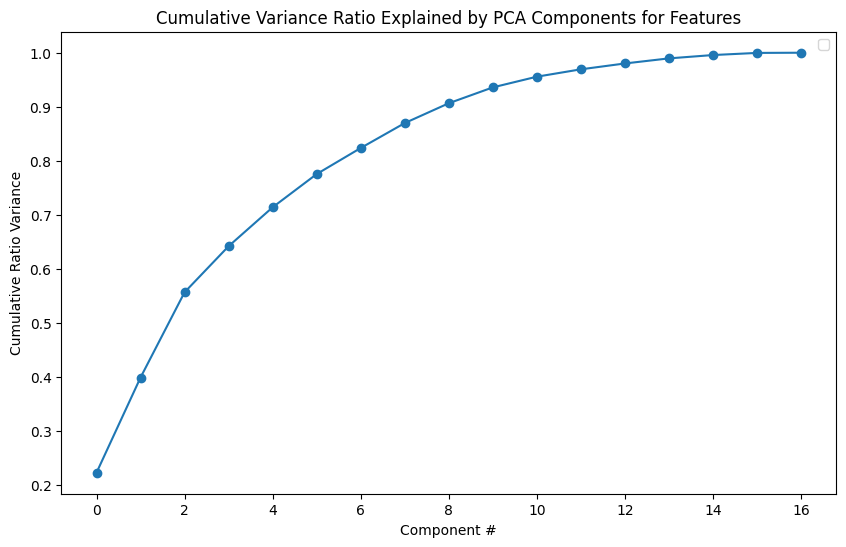

In [18]:
plt.subplots(figsize=(10, 6))
plt.plot(features_PCA.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio Explained by PCA Components for Features')
plt.legend()
plt.show()

I choose component # 2 as the elbow point.

In [19]:
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
numeric_df = energy.drop(columns=exclude_corr_columns)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'PC3': principal_components[:, 2],
    'Country': energy['country'],
    'Year': energy['year']
})
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    data,
    x='PC1',
    y='PC2',
    z='PC3',
    color=energy['country'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'PC1': 'PC 1', 'PC2': 'PC 2', 'PC3': 'PC 3'},
    hover_data={'Country': True, 'Year': True}
)
fig.show()

USA and China stand out from the rest of the group, especially in PC1. From the scatter plots of features vs. gdp per capita, we remember seeing the USA and China as outliers from the rest of the group for the 5 strong loaders shown below.

In [20]:
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

In [59]:
pca_components_df = pd.DataFrame(features_PCA.components_, columns=scaled_df.columns)
def sort_features_by_loading(component):
    return component.abs().sort_values(ascending=False)
for i in range(1):
    print(f"\nTop 10 features for PC1:")
    sorted_features = sort_features_by_loading(pca_components_df.iloc[i])
    print(sorted_features.head(10))


Top 10 features for PC1:
co2_emissions_per_capita           0.483194
electricity_fossil_fuels_output    0.482664
electricity_renewables_output      0.466680
land_area                          0.404643
electricity_nuclear_output         0.366145
lon                                0.073559
electricity_low_carbon             0.055312
gdp_per_capita                     0.051694
density                            0.043888
electricity_access_%               0.040072
Name: 0, dtype: float64


5 Distinct Top Loaders: <br>
1. co2_emissions_per_capita (0.48)
2. electricity_fossil_fuels_output (0.48)
3. electricity_renewables_output (0.46)
4. land_area (0.40)
5. electricity_nuclear_output (0.36)  

High emissions, outputs, and land area - USA and China are the 2 world leaders when it comes to manufacturing output in billions, yet are low to middling when it comes to gdp per capita. Perhaps this is due to distribution of manufacturing responsibilities - areas in the country responsible for manufactoring generate jobs and stimulate the economy, but those areas might not be dispersed evenly throughout the country.